In [7]:
'''
Task: to navigate a 40x40 square grid from 'S' to 'G' using Q learning
Assumptions:
1. The agent can move in 4 directions - up, down, left, right
2. The agent can move only to the neighbouring grids

Hyperparameters:
1. Reward = -1 for each step to find shortest path
2. Value of goal state = 100
3. Value of obstacle = -100

5. epsilon
6. gamma
7. alpha

For creating the Q table we will use epsilon greedy policy
'''


"\nTask: to navigate a 40x40 square grid from 'S' to 'G' using Q learning\nAssumptions:\n1. The agent can move in 4 directions - up, down, left, right\n2. The agent can move only to the neighbouring grids\n\nHyperparameters:\n1. Reward = -1 for each step to find shortest path\n2. Value of goal state = 100\n3. Value of obstacle = -100\n\n5. epsilon\n6. gamma\n7. alpha\n\nFor creating the Q table we will use epsilon greedy policy\n"

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import random

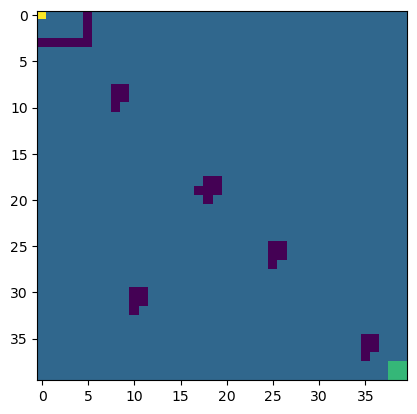

In [35]:
def dist_to_goal(a, goal):
    #min distance to all the goal states
    return min([np.linalg.norm(np.array(a)-np.array(i)) for i in goal])

with open(r"C:\Users\ganga\Documents\IISc Coursework\2nd Sem\Motion Planning\grid\MotionPlanning_2025\grid.txt") as f:
    grid = f.read().splitlines()

#Convert '.' to 0, 'X' to 1, 'S' to 0, 'G' to 100
grid_dict = {'.': 0, 'X': -1, 'S': 2, 'G': 1}
grid = np.array([[grid_dict[j] for j in i.split()] for i in grid])

#plot the grid
fig, ax = plt.subplots()
img = ax.imshow(grid, cmap='viridis')
plt.show()

start = np.where(grid == 2)
goal = np.where(grid == 1)

start = np.array([start[0][0], start[1][0]])  # Convert to (row, col)
goal = list(zip(goal[0], goal[1]))  # List of all goal coordinates


Training Complete!
Q values:  [[[  -3.          -22.7          -3.          -22.7       ]
  [  -3.           -3.           -3.          -22.7       ]
  [  -3.           -3.           -3.          -22.7       ]
  ...
  [   0.            0.            0.            0.        ]
  [   0.            0.            0.            0.        ]
  [   0.            0.            0.            0.        ]]

 [[  -3.          -22.7          -3.           -3.        ]
  [  -3.           -3.           -3.           -3.        ]
  [  -3.           -3.           -3.           -3.        ]
  ...
  [   0.            0.            0.            0.        ]
  [   0.            0.            0.            0.        ]
  [   0.            0.            0.            0.        ]]

 [[  -3.          -22.69999991 -102.69999973   -3.        ]
  [  -3.           -3.         -102.7          -3.        ]
  [  -3.           -3.         -102.7          -3.        ]
  ...
  [   0.            0.            0.            

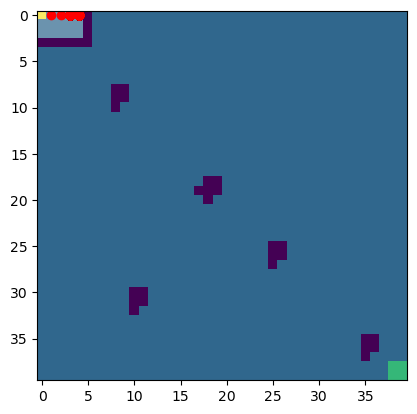

Number of states explored:  15.0


In [37]:
#Deterministic, with actions as up, down, left, right, greedy epsilon policy, constant epsilon

#Initialize a 40 x 40 x4 grid Q values: each grid has 4 possible actions
Q = np.zeros((40,40,4))
ep = 0.1 #Epsilon for epsilon greedy policy
gamma = 0.9 #Discount factor
alpha = 0.1 #Learning rate
num_episodes = 5000

#Make an array to indicate if a grid has been explored or not
explored = np.zeros((40,40))

#Q for all actions at goal state = 100
Q[goal, :] = 100
#Q for all actions at obstacle state = -100
Q[grid == -1] = -100
r = -0.3 #Reward for each step
max = 100

for i in range(num_episodes):
    current_state = start
    next_state = start 
    reward = 0
    i = 0
    while tuple(current_state) not in goal and i < max:
        i += 1
        reward = r
        #Epsilon Greedy policy
        current_state = next_state
        if random.uniform(0,1) < ep:
            action = random.choice([0,1,2,3]) #Randomly select an action up, down, left, right
        else:
            action = np.argmax(Q[current_state[0], current_state[1], :])
        
        #Move to next state
        act_dict = {0: [0,1], 1: [0,-1], 2: [1,0], 3: [-1,0]}#0 is right, 1 is left, 2 is down, 3 is up
        next_state = current_state + act_dict[action]
        
        #Check if next state is out of bounds
        if next_state[0] < 0 or next_state[0] >= 40 or next_state[1] < 0 or next_state[1] >= 40:
            next_state = current_state
            reward = -20
        #Check if next state is in an obstacle
        if grid[next_state[0], next_state[1]] == -1:
            next_state = current_state
            reward = -100
            
        if grid[next_state[0], next_state[1]] == 1:
            reward = 100
        
        #Bellman equation for updating Q. Q_this iteration = Q_previous iteration + alpha*(reward + gamma*max(Q_next_state) - Q_previous iteration)
        Q[current_state[0], current_state[1], action] = Q[current_state[0], current_state[1], action] + alpha*(reward+ gamma*np.max(Q[next_state[0], next_state[1], :]) - Q[current_state[0], current_state[1], action])
        
        explored[current_state[0], current_state[1]] = 1
        
print("Training Complete!")
print("Q values: ", Q)

#Find the path
path = []
current_state = start
action = np.argmax(Q[current_state[0], current_state[1], :])
#print(action)


while tuple(current_state) not in goal:
    action = np.argmax(Q[current_state[0], current_state[1], :])
    #print(action)
    #act_dict = {0: [0,1], 1: [0,-1], 2: [1,0], 3: [-1,0]}
    act_dict = {0: [0,1], 1: [0,-1], 2: [1,0], 3: [-1,0], 4: [1,1], 5: [1,-1], 6: [-1,1], 7: [-1,-1]}
    next_state = current_state + act_dict[action]
    #print(next_state)
    path.append(next_state)
    current_state = next_state
    #if stuck in a loop break
    if len(path) > 2000:
        print("Stuck in a loop")
        break
    

#Plot the path
fig, ax = plt.subplots()
img = ax.imshow(grid, cmap='viridis')
explored_overlay = np.where(explored, 0.5, np.nan)  # 0.5 for semi-transparent effect
ax.imshow(explored_overlay, cmap='Blues', alpha=0.3)  # Blue for explored states
for i in path: 
    plt.plot(i[1], i[0], 'ro')
plt.show()

print("Number of states explored: ", np.sum(explored))



Training Complete!
Q values:  [[[ -6.94547823  -6.93209311  -6.5956256  ...  -6.9354868   -6.92723314
    -6.92783148]
  [ -7.49604883  -7.49715539  -7.39868081 ...  -7.43334499  -7.77396407
    -7.55812073]
  [ -8.06943012  -7.76495478  -7.6127452  ...  -6.59501035  -8.0279845
    -7.87813721]
  ...
  [ -5.1864702   -5.17422118  -5.20051423 ...  -5.2382188   -5.19474717
    -5.17373048]
  [ -5.1460998   -5.15283664  -5.18937061 ...  -5.17377009  -5.18781331
    -5.22342203]
  [ -5.14169093  -5.18104906  -5.15614548 ...  -5.17157643  -5.14587207
    -5.1633904 ]]

 [[ -7.3876278   -7.52005888  -7.33488187 ...  -7.38116631  -7.7048857
    -7.37882538]
  [ -6.62533463  -6.59594259  -6.23501723 ...  -6.28824316  -6.96775543
    -6.94933008]
  [ -7.10575228  -7.13152935  -6.18843578 ...  -7.08896767  -8.04892312
    -7.34001119]
  ...
  [ -5.17010242  -5.14850921  -5.2151926  ...  -5.18636831  -5.15070431
    -5.17987655]
  [ -5.16677454  -5.17343648  -5.15028748 ...  -5.15997502  -5.15436

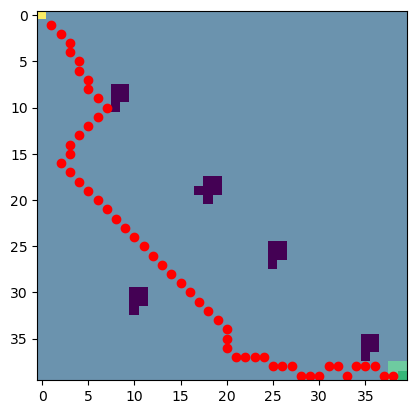

Number of states explored:  1573.0


In [18]:
#Deterministic, with actions as up, down, left, right, up-right, up-left, down-right, down-left, greedy epsilon policy, 

#Initialize a 40 x 40 x4 grid Q values: each grid has 4 possible actions
Q = np.zeros((40,40,8))
ep = 0.3 #Epsilon for epsilon greedy policy
gamma = 0.9 #Discount factor
alpha = 0.1 #Learning rate
num_episodes = 5000

#Make an array to indicate if a grid has been explored or not
explored = np.zeros((40,40))

#Q for all actions at goal state = 100
Q[goal, :] = 100
#Q for all actions at obstacle state = -100
Q[grid == -1] = -100
r = -1 #Reward for each step

for i in range(num_episodes):
    current_state = start
    next_state = start
    reward = 0
    while tuple(current_state) not in goal:
        reward = r
        #Epsilon Greedy policy
        current_state = next_state
        if random.uniform(0,1) < ep:
            action = random.choice([0,1,2,3,4,5,6,7]) #Randomly select an action up, down, left, right, up-right, up-left, down-right, down-left
        else:
            action = np.argmax(Q[current_state[0], current_state[1], :])
        
        #Move to next state
        act_dict = {0: [0,1], 1: [0,-1], 2: [1,0], 3: [-1,0], 4: [1,1], 5: [1,-1], 6: [-1,1], 7: [-1,-1]}#0 is right, 1 is left, 2 is down, 3 is up
        next_state = current_state + act_dict[action]
        
        #Check if next state is out of bounds
        if next_state[0] < 0 or next_state[0] >= 40 or next_state[1] < 0 or next_state[1] >= 40:
            next_state = current_state
            #reward = -20
        #Check if next state is in an obstacle
        if grid[next_state[0], next_state[1]] == -1:
            next_state = current_state
            reward = -100
            
        if grid[next_state[0], next_state[1]] == 1:
            reward = 100
        
        #Bellman equation for updating Q. Q_this iteration = Q_previous iteration + alpha*(reward + gamma*max(Q_next_state) - Q_previous iteration)
        Q[current_state[0], current_state[1], action] = Q[current_state[0], current_state[1], action] + alpha*(reward+ gamma*np.max(Q[next_state[0], next_state[1], :]) - Q[current_state[0], current_state[1], action])
        
        explored[current_state[0], current_state[1]] = 1
        
print("Training Complete!")
print("Q values: ", Q)

#Find the path
path = []
current_state = start
action = np.argmax(Q[current_state[0], current_state[1], :])
#print(action)


while tuple(current_state) not in goal:
    action = np.argmax(Q[current_state[0], current_state[1], :])
    #print(action)
    #act_dict = {0: [0,1], 1: [0,-1], 2: [1,0], 3: [-1,0]}
    act_dict = {0: [0,1], 1: [0,-1], 2: [1,0], 3: [-1,0], 4: [1,1], 5: [1,-1], 6: [-1,1], 7: [-1,-1]}
    next_state = current_state + act_dict[action]
    #print(next_state)
    path.append(next_state)
    current_state = next_state
    #if stuck in a loop break
    if len(path) > 2000:
        print("Stuck in a loop")
        break
    
#Plot the path
fig, ax = plt.subplots()
img = ax.imshow(grid, cmap='viridis')
explored_overlay = np.where(explored, 0.5, np.nan)  # 0.5 for semi-transparent effect
ax.imshow(explored_overlay, cmap='Blues', alpha=0.3)  # Blue for explored states
for i in path:
 
    plt.plot(i[1], i[0], 'ro')
plt.show()

print("Number of states explored: ", np.sum(explored))



Training Complete!
Q values:  [[[ -2.7162308  -22.37366147  -2.62891392 -22.37684989]
  [ -2.76824631  -2.77601212  -2.63664979 -22.4317792 ]
  [ -2.74590122  -2.74850764  -2.74567523 -22.38119364]
  ...
  [ -1.99521242  -1.99612261  -1.99493125 -21.37138569]
  [ -1.9987199   -1.98930606  -1.99058301 -21.36808141]
  [-21.03434902  -1.99316856  -1.99641279 -21.39044578]]

 [[ -2.66263847 -22.33710721  -2.58768204  -2.6965119 ]
  [ -2.74695534  -2.75258743  -2.55280129  -2.75471776]
  [ -2.72728659  -2.72793402  -2.726842    -2.72876887]
  ...
  [ -1.99298104  -1.99022543  -1.98749086  -1.99650071]
  [ -1.99172823  -1.98810876  -1.99528524  -1.99009807]
  [-21.33347894  -1.99374424  -1.9858927   -1.99031206]]

 [[ -2.57042438 -22.29869557  -2.54186883  -2.64635556]
  [ -2.7264046   -2.70887014  -2.49172222  -2.73138036]
  [ -2.7065362   -2.6837836   -2.7064181   -2.71168382]
  ...
  [ -1.98419978  -1.99126482  -1.98881863  -1.98156678]
  [ -1.98742367  -1.98387778  -1.98915436  -1.989706

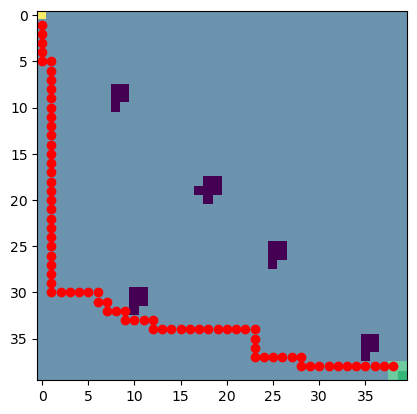

Number of states explored:  1573.0


In [19]:
#Deterministic, with actions as up, down, left, right, variable greedy epsilon policy, constant

#Initialize a 40 x 40 x4 grid Q values: each grid has 4 possible actions
Q = np.zeros((40,40,4))
ep = 0.9 #Epsilon for epsilon greedy policy
epsilon_decay = 0.999
ep_min = 0.01
gamma = 0.9 #Discount factor
alpha = 0.1 #Learning rate
num_episodes = 5000

#Make an array to indicate if a grid has been explored or not
explored = np.zeros((40,40))

#Q for all actions at goal state = 100
Q[goal, :] = 100
#Q for all actions at obstacle state = -100
Q[grid == -1] = -100
r = -0.3 #Reward for each step

for i in range(num_episodes):
    current_state = start
    next_state = start 
    reward = 0
    while tuple(current_state) not in goal:
        reward = r
        #Epsilon Greedy policy
        current_state = next_state
        if random.uniform(0,1) < ep:
            action = random.choice([0,1,2,3]) #Randomly select an action up, down, left, right
        else:
            action = np.argmax(Q[current_state[0], current_state[1], :])
        
        #Move to next state
        act_dict = {0: [0,1], 1: [0,-1], 2: [1,0], 3: [-1,0]}#0 is right, 1 is left, 2 is down, 3 is up
        next_state = current_state + act_dict[action]
        
        #Check if next state is out of bounds
        if next_state[0] < 0 or next_state[0] >= 40 or next_state[1] < 0 or next_state[1] >= 40:
            next_state = current_state
            reward = -20
        #Check if next state is in an obstacle
        if grid[next_state[0], next_state[1]] == -1:
            next_state = current_state
            reward = -100
            
        if grid[next_state[0], next_state[1]] == 1:
            reward = 100
        
        #Bellman equation for updating Q. Q_this iteration = Q_previous iteration + alpha*(reward + gamma*max(Q_next_state) - Q_previous iteration)
        Q[current_state[0], current_state[1], action] = Q[current_state[0], current_state[1], action] + alpha*(reward+ gamma*np.max(Q[next_state[0], next_state[1], :]) - Q[current_state[0], current_state[1], action])
        
        explored[current_state[0], current_state[1]] = 1
    ep = max(ep_min, epsilon_decay*ep)
print("Training Complete!")
print("Q values: ", Q)

#Find the path
path = []
current_state = start
action = np.argmax(Q[current_state[0], current_state[1], :])
#print(action)


while tuple(current_state) not in goal:
    action = np.argmax(Q[current_state[0], current_state[1], :])
    #print(action)
    #act_dict = {0: [0,1], 1: [0,-1], 2: [1,0], 3: [-1,0]}
    act_dict = {0: [0,1], 1: [0,-1], 2: [1,0], 3: [-1,0], 4: [1,1], 5: [1,-1], 6: [-1,1], 7: [-1,-1]}
    next_state = current_state + act_dict[action]
    #print(next_state)
    path.append(next_state)
    current_state = next_state
    #if stuck in a loop break
    if len(path) > 2000:
        print("Stuck in a loop")
        break
    
#Plot the path
fig, ax = plt.subplots()
img = ax.imshow(grid, cmap='viridis')
explored_overlay = np.where(explored, 0.5, np.nan)  # 0.5 for semi-transparent effect
ax.imshow(explored_overlay, cmap='Blues', alpha=0.3)  # Blue for explored states
for i in path:
 
    plt.plot(i[1], i[0], 'ro')
plt.show()

print("Number of states explored: ", np.sum(explored))


Training Complete!
Q values:  [[[-8.44199095e+00 -8.41761750e+00 -8.43964924e+00 ... -8.42920083e+00
   -8.43194389e+00 -8.39655563e+00]
  [-8.29063494e+00 -8.30374855e+00 -8.28845773e+00 ... -8.28796314e+00
   -8.31080236e+00 -8.29239419e+00]
  [-8.16337408e+00 -8.18317563e+00 -8.17274657e+00 ... -8.16915204e+00
   -8.16896387e+00 -8.16986628e+00]
  ...
  [-5.15472619e+00 -5.13736964e+00 -5.14400925e+00 ... -5.17538047e+00
   -5.15103696e+00 -5.13542276e+00]
  [-5.19823100e+00 -5.15916979e+00 -5.16152433e+00 ... -5.13678591e+00
   -5.15682167e+00 -5.12338433e+00]
  [-5.15997011e+00 -5.15890296e+00 -5.16368649e+00 ... -5.14869488e+00
   -5.12625538e+00 -5.13114016e+00]]

 [[-8.28214743e+00 -8.29753118e+00 -8.28070195e+00 ... -8.29404471e+00
   -8.29279635e+00 -8.28159992e+00]
  [-8.25882105e+00 -8.34977238e+00 -8.25043379e+00 ... -8.27744886e+00
   -8.30716002e+00 -8.29964940e+00]
  [-8.13435746e+00 -8.14483862e+00 -8.00101975e+00 ... -8.13259516e+00
   -8.13022540e+00 -8.13138245e+00]

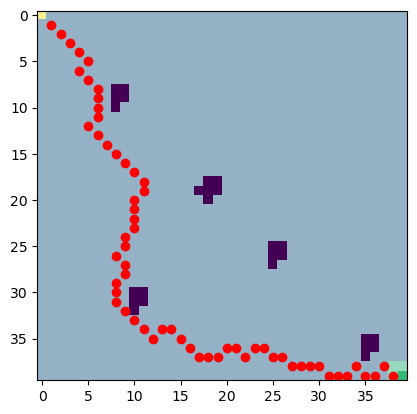

Number of states explored:  1573.0


In [32]:
#Deterministic, with actions as up, down, left, right, up-right, up-left, down-right, down-left, variable greedy epsilon policy

#Initialize a 40 x 40 x4 grid Q values: each grid has 4 possible actions
Q = np.zeros((40,40,8))
ep = 0.9 #Epsilon for epsilon greedy policy
ep_decay = 0.999 #Decay rate for epsilon
ep_min = 0.01 #Minimum epsilon
gamma = 0.9 #Discount factor
alpha = 0.1 #Learning rate
num_episodes = 5000

#Make an array to indicate if a grid has been explored or not
explored = np.zeros((40,40))

#Q for all actions at goal state = 100
Q[goal, :] = 100
#Q for all actions at obstacle state = -100
Q[grid == -1] = -100
r = -1 #Reward for each step

for i in range(num_episodes):
    current_state = start
    next_state = start
    reward = 0
    while tuple(current_state) not in goal:
        reward = r
        #Epsilon Greedy policy
        current_state = next_state
        if random.uniform(0,1) < ep:
            action = random.choice([0,1,2,3,4,5,6,7]) #Randomly select an action up, down, left, right, up-right, up-left, down-right, down-left
        else:
            action = np.argmax(Q[current_state[0], current_state[1], :])
        
        #Move to next state
        act_dict = {0: [0,1], 1: [0,-1], 2: [1,0], 3: [-1,0], 4: [1,1], 5: [1,-1], 6: [-1,1], 7: [-1,-1]}#0 is right, 1 is left, 2 is down, 3 is up
        next_state = current_state + act_dict[action]
        
        #Check if next state is out of bounds
        if next_state[0] < 0 or next_state[0] >= 40 or next_state[1] < 0 or next_state[1] >= 40:
            next_state = current_state
            #reward = -20
        #Check if next state is in an obstacle
        if grid[next_state[0], next_state[1]] == -1:
            next_state = current_state
            reward = -100
            
        if grid[next_state[0], next_state[1]] == 1:
            reward = 100
        
        #Bellman equation for updating Q. Q_this iteration = Q_previous iteration + alpha*(reward + gamma*max(Q_next_state) - Q_previous iteration)
        Q[current_state[0], current_state[1], action] = Q[current_state[0], current_state[1], action] + alpha*(reward+ gamma*np.max(Q[next_state[0], next_state[1], :]) - Q[current_state[0], current_state[1], action])
        
        explored[current_state[0], current_state[1]] = 1
    ep = max(ep*ep_decay, ep_min)
print("Training Complete!")
print("Q values: ", Q)

#Find the path
path = []
current_state = start
action = np.argmax(Q[current_state[0], current_state[1], :])
#print(action)


while tuple(current_state) not in goal:
    action = np.argmax(Q[current_state[0], current_state[1], :])
    #print(action)
    #act_dict = {0: [0,1], 1: [0,-1], 2: [1,0], 3: [-1,0]}
    act_dict = {0: [0,1], 1: [0,-1], 2: [1,0], 3: [-1,0], 4: [1,1], 5: [1,-1], 6: [-1,1], 7: [-1,-1]}
    next_state = current_state + act_dict[action]
    #print(next_state)
    path.append(next_state)
    current_state = next_state
    #if stuck in a loop break
    if len(path) > 2000:
        print("Stuck in a loop")
        break
    
#Plot the path
fig, ax = plt.subplots()
img = ax.imshow(grid, cmap='viridis')
explored_overlay = np.where(explored, 0.5, np.nan)  # 0.5 for semi-transparent effect
ax.imshow(explored_overlay, cmap='Blues', alpha=0.3)  # Blue for explored states

explored_overlay = np.where(explored, 0.5, np.nan)  # 0.5 for semi-transparent effect
ax.imshow(explored_overlay, cmap='Blues', alpha=0.3)  # Blue for explored states

for i in path:
 
    plt.plot(i[1], i[0], 'ro')
plt.show()

print("Number of states explored: ", np.sum(explored))

Training Complete!
Q values:  [[[ 9.02712064e+01  6.12783632e+01  9.03383130e+01  6.12968747e+01]
  [ 8.16287244e+01  7.74164715e+01  9.03725951e+01  5.80532324e+01]
  [ 4.08734738e+01  5.43174735e+01  8.86528174e+01  3.48305746e+01]
  ...
  [ 2.85606900e+00  0.00000000e+00  1.42055784e+00 -1.82634410e+00]
  [-1.76417200e-01  7.36559000e-02  3.15727839e+00 -1.84610000e+00]
  [-9.34620220e+00  2.11679000e-01  9.00000000e-01 -8.16875858e+00]]

 [[ 9.03759123e+01  6.13274111e+01  9.03283066e+01  8.02901004e+01]
  [ 9.03938164e+01  8.03249760e+01  9.04176911e+01  8.02994591e+01]
  [ 8.32484917e+01  7.82783050e+01  9.04610193e+01  7.42689956e+01]
  ...
  [ 2.48861274e+00 -1.09000000e-01  5.78397595e+00  5.65559000e-02]
  [-1.00000000e-01  6.90870983e-01  1.55847902e+00 -1.90000000e-02]
  [-1.90509803e+00 -9.74826100e-02  2.07597154e+00 -1.09000000e-01]]

 [[ 9.04154143e+01  5.83339310e+01  7.67603910e+01  7.80459459e+01]
  [ 9.04641136e+01  8.03524766e+01  9.04318581e+01  8.03684697e+01]
  

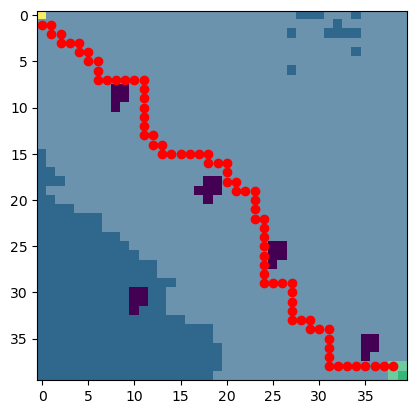

Number of states explored:  1292.0


In [21]:
#Deterministic, #euclidean distance based reward #, with actions as up, down, left, right, variable greedy epsilon policy, constant

def dist_to_goal(a, goal):
    #min distance to all the goal states
    return min([np.linalg.norm(a-i) for i in goal])
    

#Initialize a 40 x 40 x4 grid Q values: each grid has 4 possible actions
Q = np.zeros((40,40,4))
ep = 0.8 #Epsilon for epsilon greedy policy
epsilon_decay = 0.999
ep_min = 0.01
gamma = 0.9 #Discount factor
alpha = 0.1 #Learning rate
num_episodes = 4000

#Make an array to indicate if a grid has been explored or not
explored = np.zeros((40,40))

#Q for all actions at goal state = 100
Q[goal, :] = 100
#Q for all actions at obstacle state = -100
Q[grid == -1] = -100
r = -1 #Reward for each step

for i in range(num_episodes):
    current_state = start
    next_state = start 
    while tuple(current_state) not in goal:
        reward = r
        #Epsilon Greedy policy
        current_state = next_state
        if random.uniform(0,1) < ep:
            action = random.choice([0,1,2,3]) #Randomly select an action up, down, left, right
        else:
            action = np.argmax(Q[current_state[0], current_state[1], :])
        
        #Move to next state
        act_dict = {0: [0,1], 1: [0,-1], 2: [1,0], 3: [-1,0]}#0 is right, 1 is left, 2 is down, 3 is up
        next_state = current_state + act_dict[action]
        
        #Check if next state is out of bounds
        if next_state[0] < 0 or next_state[0] >= 40 or next_state[1] < 0 or next_state[1] >= 40:
            next_state = current_state
            reward = -20
        #Check if next state is in an obstacle
        if grid[next_state[0], next_state[1]] == -1:
            next_state = current_state
            reward = -100
        #Check if next state is the goal state
        if grid[next_state[0], next_state[1]] == 1:
            reward = 100
            
        if dist_to_goal(next_state, goal) < dist_to_goal(current_state, goal):
            reward = reward + 10
        
        #Bellman equation for updating Q. Q_this iteration = Q_previous iteration + alpha*(reward + gamma*max(Q_next_state) - Q_previous iteration)
        Q[current_state[0], current_state[1], action] = Q[current_state[0], current_state[1], action] + alpha*(reward+ gamma*np.max(Q[next_state[0], next_state[1], :]) - Q[current_state[0], current_state[1], action])
        
        explored[current_state[0], current_state[1]] = 1
    ep = max(ep_min, epsilon_decay*ep)
print("Training Complete!")
print("Q values: ", Q)

#Find the path
path = []
current_state = start
action = np.argmax(Q[current_state[0], current_state[1], :])
#print(action)


while tuple(current_state) not in goal:
    action = np.argmax(Q[current_state[0], current_state[1], :])
    #print(action)
    #act_dict = {0: [0,1], 1: [0,-1], 2: [1,0], 3: [-1,0]}
    act_dict = {0: [0,1], 1: [0,-1], 2: [1,0], 3: [-1,0], 4: [1,1], 5: [1,-1], 6: [-1,1], 7: [-1,-1]}
    next_state = current_state + act_dict[action]
    #print(next_state)
    path.append(next_state)
    current_state = next_state
    #if stuck in a loop break
    if len(path) > 2000:
        print("Stuck in a loop")
        break
    
#Plot the path
fig, ax = plt.subplots()
img = ax.imshow(grid, cmap='viridis')
explored_overlay = np.where(explored, 0.5, np.nan)  # 0.5 for semi-transparent effect
ax.imshow(explored_overlay, cmap='Blues', alpha=0.3)  # Blue for explored states
for i in path:
 
    plt.plot(i[1], i[0], 'ro')
plt.show()

print("Number of states explored: ", np.sum(explored))


Training Complete!
Q values:  [[[ 7.85361039e+01  1.53835655e+02  2.90538272e+02 ...  1.86256306e+02
    1.78663832e+02  1.91806139e+02]
  [ 9.41240485e+01  2.60807477e+01  1.64834661e+01 ...  2.35876845e+01
    1.79599582e+01  1.75949523e+01]
  [ 2.36008860e+01  1.87652844e+01  9.24670145e+01 ...  1.84785242e+01
    6.39335463e+00  1.04200274e+01]
  ...
  [ 5.77100000e+00  5.64290000e-01  0.00000000e+00 ...  3.42151466e+00
    7.96841000e-01 -1.90000000e-01]
  [ 0.00000000e+00  4.19390000e-01  5.82007668e+00 ...  0.00000000e+00
    0.00000000e+00  0.00000000e+00]
  [ 0.00000000e+00  0.00000000e+00  2.90000000e+00 ...  0.00000000e+00
    0.00000000e+00  0.00000000e+00]]

 [[ 1.36882313e+02  1.25328222e+02  2.90598245e+02 ...  1.93700932e+02
    5.63248342e+01  1.04198336e+02]
  [ 4.15918143e+01  2.21363688e+01  2.35334012e+02 ...  2.41481672e+01
    4.71003981e+00  3.94911882e+00]
  [ 9.48721772e+01  3.05508620e+01  2.55498218e+01 ...  1.39431862e+01
    3.56794735e+00  1.52115198e+01]

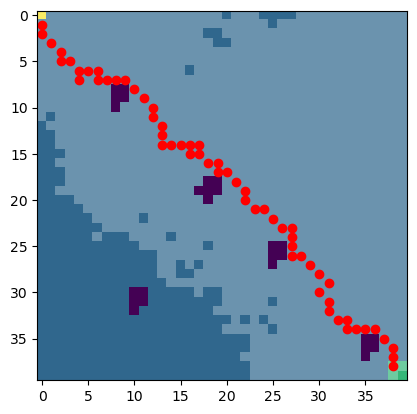

Number of states explored:  1229.0


In [20]:
#Deterministic, with actions as up, down, left, right, up-right, up-left, down-right, down-left, variable greedy epsilon policy
def dist_to_goal(a, goal):
    #min distance to all the goal states
    return min([np.linalg.norm(a-i) for i in goal])

#Initialize a 40 x 40 x4 grid Q values: each grid has 4 possible actions
Q = np.zeros((40,40,8))
ep = 0.9 #Epsilon for epsilon greedy policy
ep_decay = 0.99 #Decay rate for epsilon
ep_min = 0.01 #Minimum epsilon
gamma = 0.9 #Discount factor
alpha = 0.1 #Learning rate
num_episodes = 4000

#Make an array to indicate if a grid has been explored or not
explored = np.zeros((40,40))

#Q for all actions at goal state = 100
Q[goal, :] = 100
#Q for all actions at obstacle state = -100
Q[grid == -1] = -100
r = -1 #Reward for each step

for i in range(num_episodes):
    current_state = start
    next_state = start
    reward = 0
    while tuple(current_state) not in goal:
        reward = r
        #Epsilon Greedy policy
        current_state = next_state
        if random.uniform(0,1) < ep:
            action = random.choice([0,1,2,3,4,5,6,7]) #Randomly select an action up, down, left, right, up-right, up-left, down-right, down-left
        else:
            action = np.argmax(Q[current_state[0], current_state[1], :])
        
        #Move to next state
        act_dict = {0: [0,1], 1: [0,-1], 2: [1,0], 3: [-1,0], 4: [1,1], 5: [1,-1], 6: [-1,1], 7: [-1,-1]}#0 is right, 1 is left, 2 is down, 3 is up
        next_state = current_state + act_dict[action]
        
        #Check if next state is out of bounds
        if next_state[0] < 0 or next_state[0] >= 40 or next_state[1] < 0 or next_state[1] >= 40:
            next_state = current_state
            #reward = -20
        #Check if next state is in an obstacle
        if grid[next_state[0], next_state[1]] == -1:
            next_state = current_state
            reward = -100
            
        if grid[next_state[0], next_state[1]] == 1:
            reward = 100
            
        if dist_to_goal(next_state, goal) < dist_to_goal(current_state, goal):
            reward = reward + 30
            
        #Bellman equation for updating Q. Q_this iteration = Q_previous iteration + alpha*(reward + gamma*max(Q_next_state) - Q_previous iteration)
        Q[current_state[0], current_state[1], action] = Q[current_state[0], current_state[1], action] + alpha*(reward+ gamma*np.max(Q[next_state[0], next_state[1], :]) - Q[current_state[0], current_state[1], action])
        
        explored[current_state[0], current_state[1]] = 1
    ep = max(ep*ep_decay, ep_min)
print("Training Complete!")
print("Q values: ", Q)

#Find the path
path = []
current_state = start
action = np.argmax(Q[current_state[0], current_state[1], :])
#print(action)


while tuple(current_state) not in goal:
    action = np.argmax(Q[current_state[0], current_state[1], :])
    #print(action)
    #act_dict = {0: [0,1], 1: [0,-1], 2: [1,0], 3: [-1,0]}
    act_dict = {0: [0,1], 1: [0,-1], 2: [1,0], 3: [-1,0], 4: [1,1], 5: [1,-1], 6: [-1,1], 7: [-1,-1]}
    next_state = current_state + act_dict[action]
    #print(next_state)
    path.append(next_state)
    current_state = next_state
    #if stuck in a loop break
    if len(path) > 2000:
        print("Stuck in a loop")
        break
    
#Plot the path
fig, ax = plt.subplots()
img = ax.imshow(grid, cmap='viridis')
explored_overlay = np.where(explored, 0.5, np.nan)  # 0.5 for semi-transparent effect
ax.imshow(explored_overlay, cmap='Blues', alpha=0.3)  # Blue for explored states
for i in path:
 
    plt.plot(i[1], i[0], 'ro')
plt.show()

print("Number of states explored: ", np.sum(explored))

Training Complete!
Q values:  [[[216.83532102 209.04985886 290.07330648 182.51908669]
  [ 26.47254728  53.34622165 270.46706421  62.62610434]
  [ 34.18891337   7.85722309  12.97319537   2.71966839]
  ...
  [ 11.59231898   8.77945254   8.77945254   8.59165802]
  [  8.5989286    8.59826764   8.78679656   8.78679656]
  [  8.5989286    8.78679656  11.6491704    8.5989286 ]]

 [[290.08166146 190.88076369 163.95666047 210.67006336]
  [ 87.77227583 168.73679277 290.09097089 156.90654132]
  [ 87.45282383  27.49813779  19.33326145   7.1943745 ]
  ...
  [ 12.14480018   9.33749632   9.33749632   9.33749632]
  [  9.15158837   9.34503876   9.34503876   9.10134657]
  [  8.67976288   9.15158837  12.20183017   9.34503876]]

 [[268.24472082  28.80033085  38.65828425  40.31888128]
  [144.39485528 151.84587505 290.10133939 183.64274352]
  [ 14.64433492  35.55752699 200.59513454  10.47900769]
  ...
  [ 12.69727146   9.89552909   9.89552909   9.64635085]
  [  9.90328096   9.90328096  12.75448994   9.903280

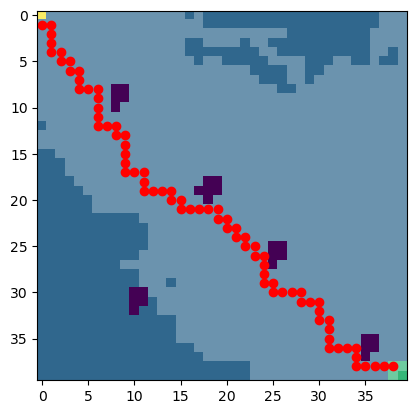

Number of states explored:  1188.0


In [22]:
#Deterministic, with actions as up, down, left, right, variable greedy epsilon policy, #Initialised Q values based on distance to goal#
def dist_to_goal(a, goal):
    #min distance to all the goal states
    return min([np.linalg.norm(np.array(a)-np.array(i)) for i in goal])

#Initialize a 40 x 40 x4 grid Q values: each grid has 4 possible actions
Q = np.zeros((40,40,4))
ep = 0.9 #Epsilon for epsilon greedy policy
ep_decay = 0.99 #Decay rate for epsilon
ep_min = 0.01 #Minimum epsilon
gamma = 0.9 #Discount factor
alpha = 0.1 #Learning rate
num_episodes = 3000
grid_size = grid.shape
r = -1
#Make an array to indicate if a grid has been explored or not
explored = np.zeros(grid_size)

# Set goal state Q-values
for g in goal:
    Q[g[0], g[1], :] = 100  # Assign high reward to all actions at goal states
    
# Set obstacle states Q-values
Q[grid == -1] = -100  # Ensure grid indexing is correct

# Map the distance to the goal as a reward function
max_dist = dist_to_goal(start, goal)

# Assign rewards based on distance to goal
for i in range(grid_size[0]):
    for j in range(grid_size[1]):
        if grid[i, j] == 0:  # Ignore obstacles
            dist = dist_to_goal((i, j), goal)
            Q[i, j, :] = (max_dist - dist) * (30 / max_dist)
for i in range(num_episodes):
    current_state = start
    next_state = start
    reward = 0
    while tuple(current_state) not in goal:
        reward = r
        #Epsilon Greedy policy
        current_state = next_state
        if random.uniform(0,1) < ep:
            action = random.choice([0,1,2,3]) #Randomly select an action up, down, left, right, up-right, up-left, down-right, down-left
        else:
            action = np.argmax(Q[current_state[0], current_state[1], :])
        
        #Move to next state
        act_dict = {0: [0,1], 1: [0,-1], 2: [1,0], 3: [-1,0]}#0 is right, 1 is left, 2 is down, 3 is up
        next_state = current_state + act_dict[action]
        
        #Check if next state is out of bounds
        if next_state[0] < 0 or next_state[0] >= 40 or next_state[1] < 0 or next_state[1] >= 40:
            next_state = current_state
            #reward = -20
        #Check if next state is in an obstacle
        if grid[next_state[0], next_state[1]] == -1:
            next_state = current_state
            reward = -100
            
        if grid[next_state[0], next_state[1]] == 1:
            reward = 100
            
        if dist_to_goal(next_state, goal) < dist_to_goal(current_state, goal):
            reward = reward + 30
            
        #Bellman equation for updating Q. Q_this iteration = Q_previous iteration + alpha*(reward + gamma*max(Q_next_state) - Q_previous iteration)
        Q[current_state[0], current_state[1], action] = Q[current_state[0], current_state[1], action] + alpha*(reward+ gamma*np.max(Q[next_state[0], next_state[1], :]) - Q[current_state[0], current_state[1], action])
        
        explored[current_state[0], current_state[1]] = 1
    ep = max(ep*ep_decay, ep_min)
print("Training Complete!")
print("Q values: ", Q)

#Find the path
path = []
current_state = start
action = np.argmax(Q[current_state[0], current_state[1], :])
#print(action)


while tuple(current_state) not in goal:
    action = np.argmax(Q[current_state[0], current_state[1], :])
    #print(action)
    #act_dict = {0: [0,1], 1: [0,-1], 2: [1,0], 3: [-1,0]}
    act_dict = {0: [0,1], 1: [0,-1], 2: [1,0], 3: [-1,0], 4: [1,1], 5: [1,-1], 6: [-1,1], 7: [-1,-1]}
    next_state = current_state + act_dict[action]
    #print(next_state)
    path.append(next_state)
    current_state = next_state
    #if stuck in a loop break
    if len(path) > 2000:
        print("Stuck in a loop")
        break
    
#Plot the path
fig, ax = plt.subplots()
img = ax.imshow(grid, cmap='viridis')
explored_overlay = np.where(explored, 0.5, np.nan)  # 0.5 for semi-transparent effect
ax.imshow(explored_overlay, cmap='Blues', alpha=0.3)  # Blue for explored states

for i in path:
 
    plt.plot(i[1], i[0], 'ro')
plt.show()

print("Number of states explored: ", np.sum(explored))

Training Complete!
Q values:  [[[ 92.15050736 130.24776191  91.43854898 ... 131.89870422 110.74143776
   123.020831  ]
  [141.07364124   2.06503356  13.84595856 ...   1.86302996   8.62995125
     5.36817191]
  [ 40.71516918  12.60354012  19.54165785 ...  20.50898306  10.26273671
     6.71122294]
  ...
  [  8.77945254   8.77945254   8.77945254 ...   8.77945254   8.77945254
     8.77945254]
  [  8.78679656   8.78679656   8.78679656 ...   8.78679656   8.78679656
     8.78679656]
  [  8.78679656   8.78679656   8.78679656 ...   8.78679656   8.78679656
     8.78679656]]

 [[ 20.94617965   7.00585841  11.7093205  ...  -1.61919798  18.39786691
     0.63469075]
  [100.01613979  56.69356386 157.71494911 ...  42.74281241  62.28321718
   183.39181732]
  [180.04375295  27.58062376  24.15182759 ...   2.63356888  15.14960664
     3.89269074]
  ...
  [  9.33749632   9.14208639   9.33749632 ...   9.33749632   9.33749632
     9.33749632]
  [  9.34503876   9.34503876   9.34503876 ...   9.34503876   9.345

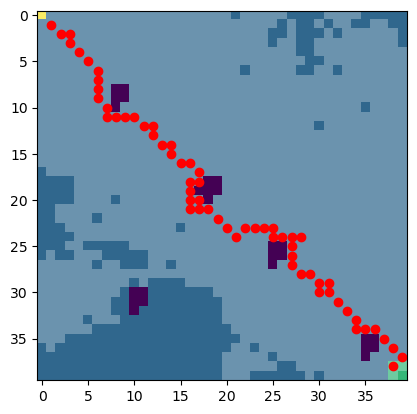

Number of states explored:  1315.0


In [ ]:
#Deterministic, with actions as up, down, left, right, up-right, up-left, down-right, down-left, variable greedy epsilon policy, #Initialised Q values based on distance to goal#

#Initialize a 40 x 40 x4 grid Q values: each grid has 4 possible actions
Q = np.zeros((40,40,8))
ep = 0.9 #Epsilon for epsilon greedy policy
ep_decay = 0.99 #Decay rate for epsilon
ep_min = 0.01 #Minimum epsilon
gamma = 0.9 #Discount factor
alpha = 0.1 #Learning rate
num_episodes = 4000
grid_size = grid.shape
r = -1 #Reward for each step

#Make an array to indicate if a grid has been explored or not
explored = np.zeros(grid_size)

# Set goal state Q-values
for g in goal:
    Q[g[0], g[1], :] = 100  # Assign high reward to all actions at goal states
    
# Set obstacle states Q-values
Q[grid == -1] = -100  # Ensure grid indexing is correct

# Map the distance to the goal as a reward function
max_dist = dist_to_goal(start, goal)

# Assign rewards based on distance to goal
for i in range(grid_size[0]):
    for j in range(grid_size[1]):
        if grid[i, j] == 0:  # Ignore obstacles
            dist = dist_to_goal((i, j), goal)
            Q[i, j, :] = (max_dist - dist) * (30 / max_dist)
            
            
for i in range(num_episodes):
    current_state = start
    next_state = start
    reward = 0
    while tuple(current_state) not in goal:
        reward = r
        #Epsilon Greedy policy
        current_state = next_state
        
        
        if random.uniform(0,1) < ep:
            action = random.choice([0,1,2,3,4,5,6,7]) #Randomly select an action up, down, left, right, up-right, up-left, down-right, down-left
        else:
            action = np.argmax(Q[current_state[0], current_state[1], :])
        
        #Move to next state
        act_dict = {0: [0,1], 1: [0,-1], 2: [1,0], 3: [-1,0], 4: [1,1], 5: [1,-1], 6: [-1,1], 7: [-1,-1]}#0 is right, 1 is left, 2 is down, 3 is up
        next_state = current_state + act_dict[action]
        
        #Check if next state is out of bounds
        if next_state[0] < 0 or next_state[0] >= 40 or next_state[1] < 0 or next_state[1] >= 40:
            next_state = current_state
            reward = -20
        #Check if next state is in an obstacle
        if grid[next_state[0], next_state[1]] == -1:
            next_state = current_state
            reward = -100
            
        if grid[next_state[0], next_state[1]] == 1:
            reward = 100
            
        if dist_to_goal(next_state, goal) < dist_to_goal(current_state, goal):
            reward = reward + 30
            
        #Bellman equation for updating Q. Q_this iteration = Q_previous iteration + alpha*(reward + gamma*max(Q_next_state) - Q_previous iteration)
        Q[current_state[0], current_state[1], action] = Q[current_state[0], current_state[1], action] + alpha*(reward+ gamma*np.max(Q[next_state[0], next_state[1], :]) - Q[current_state[0], current_state[1], action])
        
        explored[current_state[0], current_state[1]] = 1
    ep = max(ep*ep_decay, ep_min)
print("Training Complete!")
print("Q values: ", Q)

#Find the path
path = []
current_state = start
action = np.argmax(Q[current_state[0], current_state[1], :])
#print(action)


while tuple(current_state) not in goal:
    action = np.argmax(Q[current_state[0], current_state[1], :])
    #print(action)
    #act_dict = {0: [0,1], 1: [0,-1], 2: [1,0], 3: [-1,0]}
    act_dict = {0: [0,1], 1: [0,-1], 2: [1,0], 3: [-1,0], 4: [1,1], 5: [1,-1], 6: [-1,1], 7: [-1,-1]}
    next_state = current_state + act_dict[action]
    #print(next_state)
    path.append(next_state)
    current_state = next_state
    #if stuck in a loop break
    if len(path) > 100:
        print("Stuck in a loop")
        break
    
#Plot the path
fig, ax = plt.subplots()
img = ax.imshow(grid, cmap='viridis')
explored_overlay = np.where(explored, 0.5, np.nan)  # 0.5 for semi-transparent effect
ax.imshow(explored_overlay, cmap='Blues', alpha=0.3)  # Blue for explored states
for i in path:
 
    plt.plot(i[1], i[0], 'ro')
plt.show()

print("Number of states explored: ", np.sum(explored))

Training Complete!
Q values:  [[[ 71.98942224  67.84192854  78.06128402  67.12953902]
  [ 79.30585124  25.72350689  32.47465885  22.6908242 ]
  [ 43.46442367  28.84316781  77.46062824  40.71093553]
  ...
  [  5.28677353   2.98188466   2.94558004   3.08449046]
  [  2.79964287   2.90234465   2.92893219   2.8954882 ]
  [  2.79964287   2.79964287   2.92893219   2.92893219]]

 [[ 78.9844337   61.29348838  53.83248823  60.12555678]
  [ 78.92001916  62.29611158  63.50394159  55.14659374]
  [ 78.12911367  54.85752304  62.19526806  63.91084828]
  ...
  [  3.11249877   3.11249877   3.11249877   3.11249877]
  [  3.11501292   3.11501292   3.11501292   3.11501292]
  [  3.11501292   3.11501292   3.11501292   3.11501292]]

 [[ 76.68089642  17.17024162  20.61318695  15.95146364]
  [ 77.06308134  19.71634854  24.03391061  21.48561352]
  [ 25.57087041  25.51384957  78.20480447  26.15588584]
  ...
  [  4.16575715   3.2985097    3.2985097    3.2985097 ]
  [  3.16808272   3.30109365   4.18482998   3.301093

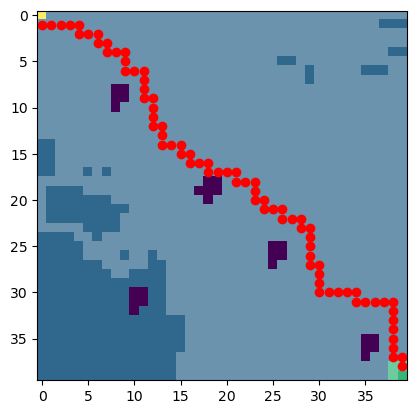

Number of states explored:  1321.0
Path length:  77


In [ ]:
#Stochastic, with actions as up, down, left, right, variable greedy epsilon policy, #Initialised Q values based on distance to goal#

#Initialize a 40 x 40 x4 grid Q values: each grid has 4 possible actions
Q = np.zeros((40,40,4))
ep = 0.9 #Epsilon for epsilon greedy policy
ep_decay = 0.99 #Decay rate for epsilon
ep_min = 0.01 #Minimum epsilon
gamma = 0.9 #Discount factor
alpha = 0.1 #Learning rate
num_episodes = 5000
grid_size = grid.shape
prob_action = 0.8
r = -1
#Make an array to indicate if a grid has been explored or not
explored = np.zeros(grid_size)



# Set goal state Q-values
for g in goal:
    Q[g[0], g[1], :] = 100  # Assign high reward to all actions at goal states
    
# Set obstacle states Q-values
Q[grid == -1] = -100  # Ensure grid indexing is correct

# Map the distance to the goal as a reward function
max_dist = dist_to_goal(start, goal)

# Assign rewards based on distance to goal
for i in range(grid_size[0]):
    for j in range(grid_size[1]):
        if grid[i, j] == 0:  # Ignore obstacles
            dist = dist_to_goal((i, j), goal)
            Q[i, j, :] = (max_dist - dist) * (10 / max_dist)
            
for i in range(num_episodes):
    current_state = start
    next_state = start
    reward = 0
    while tuple(current_state) not in goal:
        reward = r
        #Epsilon Greedy policy
        current_state = next_state
        if random.uniform(0,1) < ep:
            action = random.choice([0,1,2,3]) #Randomly select an action up, down, left, right, up-right, up-left, down-right, down-left
        else:
            action = np.argmax(Q[current_state[0], current_state[1], :])
        
        
        act_dict = {0: [0,1], 1: [0,-1], 2: [1,0], 3: [-1,0]}#0 is right, 1 is left, 2 is down, 3 is up
        if random.uniform(0,1) < prob_action:
            next_state = current_state + act_dict[action]
        else:
            next_state = current_state + random.choice(list(act_dict.values()))
        
        #Check if next state is out of bounds
        if next_state[0] < 0 or next_state[0] >= 40 or next_state[1] < 0 or next_state[1] >= 40:
            next_state = current_state
            #reward = -20
        #Check if next state is in an obstacle
        if grid[next_state[0], next_state[1]] == -1:
            next_state = current_state
            reward = -100
            
        if grid[next_state[0], next_state[1]] == 1:
            reward = 100
            
        if dist_to_goal(next_state, goal) < dist_to_goal(current_state, goal):
            reward = reward + 10
            
        #Bellman equation for updating Q. Q_this iteration = Q_previous iteration + alpha*(reward + gamma*max(Q_next_state) - Q_previous iteration)
        Q[current_state[0], current_state[1], action] = Q[current_state[0], current_state[1], action] + alpha*(reward+ gamma*np.max(Q[next_state[0], next_state[1], :]) - Q[current_state[0], current_state[1], action])
        
        explored[current_state[0], current_state[1]] = 1
    ep = max(ep*ep_decay, ep_min)
print("Training Complete!")
print("Q values: ", Q)

#Find the path
path = []
current_state = start
action = np.argmax(Q[current_state[0], current_state[1], :])
#print(action)
path_len =0

while tuple(current_state) not in goal:
    path_len += 1
    action = np.argmax(Q[current_state[0], current_state[1], :])
    #print(action)
    act_dict = {0: [0,1], 1: [0,-1], 2: [1,0], 3: [-1,0]}
    #act_dict = {0: [0,1], 1: [0,-1], 2: [1,0], 3: [-1,0], 4: [1,1], 5: [1,-1], 6: [-1,1], 7: [-1,-1]}
    next_state = current_state + act_dict[action]
    #print(next_state)
    path.append(next_state)
    current_state = next_state
    
    #if stuck in a loop break
    if len(path) > 2000:
        print("Stuck in a loop")
        break
    
#Plot the path
fig, ax = plt.subplots()
img = ax.imshow(grid, cmap='viridis')
explored_overlay = np.where(explored, 0.5, np.nan)  # 0.5 for semi-transparent effect
ax.imshow(explored_overlay, cmap='Blues', alpha=0.3)  # Blue for explored states
for i in path:
 
    plt.plot(i[1], i[0], 'ro')
plt.show()

print("Number of states explored: ", np.sum(explored))
print("Path length: ", path_len)

Training Complete!
Q values:  [[[ 33.00317958  42.17332714  43.2455098  ...  39.17264863  53.24009904
    40.45390346]
  [ 74.43760131   7.3577251    6.45552819 ...  13.88121102  14.01995135
     1.94162368]
  [ 23.95832102  12.22499015  73.8868685  ...   5.91364761  12.06998935
    11.72885872]
  ...
  [  2.79721934   2.92648418   2.92648418 ...   2.92648418   2.92648418
     3.91384571]
  [  2.92893219   2.92893219   2.92893219 ...   2.92893219   2.92893219
     2.92893219]
  [  2.68328248   2.79964287   3.90395276 ...   2.92893219   2.92893219
     2.79964287]]

 [[ 73.11005443  11.59946639   8.27534413 ...   8.47250591   6.94340981
    15.60541539]
  [ 75.20875225  46.03961275  42.95650734 ...  41.36687193  49.93265363
    44.14356093]
  [ 74.18936495  37.53881153  49.77179329 ...  33.1961306   52.28895245
    40.98001805]
  ...
  [  3.11249877   3.11249877   5.0922483  ...   4.1975972    3.11249877
     3.06396546]
  [  3.11501292   3.06887846   3.11501292 ...   4.18051722   3.806

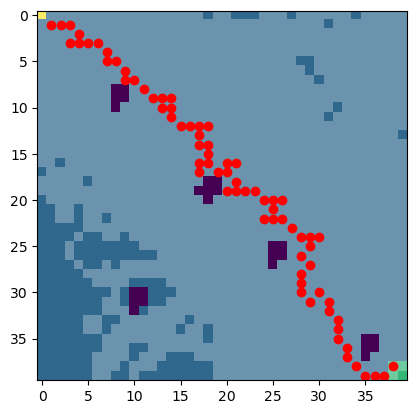

Number of states explored:  1390.0
Path length:  72


In [ ]:
#Stochastic, with actions as up, down, left, right, variable greedy epsilon policy, #Initialised Q values based on distance to goal#

#Initialize a 40 x 40 x4 grid Q values: each grid has 4 possible actions
Q = np.zeros((40,40,8))
ep = 0.9 #Epsilon for epsilon greedy policy
ep_decay = 0.99 #Decay rate for epsilon
ep_min = 0.01 #Minimum epsilon
gamma = 0.9 #Discount factor
alpha = 0.1 #Learning rate
num_episodes = 5000
grid_size = grid.shape
prob_action = 0.8
r = -1
#Make an array to indicate if a grid has been explored or not
explored = np.zeros(grid_size)

# Set goal state Q-values
for g in goal:
    Q[g[0], g[1], :] = 100  # Assign high reward to all actions at goal states
    
# Set obstacle states Q-values
Q[grid == -1] = -100  # Ensure grid indexing is correct

# Map the distance to the goal as a reward function
max_dist = dist_to_goal(start, goal)

# Assign rewards based on distance to goal
for i in range(grid_size[0]):
    for j in range(grid_size[1]):
        if grid[i, j] == 0:  # Ignore obstacles
            dist = dist_to_goal((i, j), goal)
            Q[i, j, :] = (max_dist - dist) * (10 / max_dist)
            
for i in range(num_episodes):
    current_state = start
    next_state = start
    reward = 0
    while tuple(current_state) not in goal:
        reward = r
        #Epsilon Greedy policy
        current_state = next_state
        if random.uniform(0,1) < ep:
            action = random.choice([0,1,2,3,4,5,6,7]) #Randomly select an action up, down, left, right, up-right, up-left, down-right, down-left
        else:
            action = np.argmax(Q[current_state[0], current_state[1], :])
        
        #Move to next state
        act_dict = {0: [0,1], 1: [0,-1], 2: [1,0], 3: [-1,0], 4: [1,1], 5: [1,-1], 6: [-1,1], 7: [-1,-1]}#0 is right, 1 is left, 2 is down, 3 is up
        
        
        
        if random.uniform(0,1) < prob_action:
            next_state = current_state + act_dict[action]
        else:
            next_state = current_state + random.choice(list(act_dict.values()))
        
        #Check if next state is out of bounds
        if next_state[0] < 0 or next_state[0] >= 40 or next_state[1] < 0 or next_state[1] >= 40:
            next_state = current_state
            #reward = -20
        #Check if next state is in an obstacle
        if grid[next_state[0], next_state[1]] == -1:
            next_state = current_state
            reward = -100
            
        if grid[next_state[0], next_state[1]] == 1:
            reward = 100
            
        if dist_to_goal(next_state, goal) < dist_to_goal(current_state, goal):
            reward = reward + 10
            
        #Bellman equation for updating Q. Q_this iteration = Q_previous iteration + alpha*(reward + gamma*max(Q_next_state) - Q_previous iteration)
        Q[current_state[0], current_state[1], action] = Q[current_state[0], current_state[1], action] + alpha*(reward+ gamma*np.max(Q[next_state[0], next_state[1], :]) - Q[current_state[0], current_state[1], action])
        
        explored[current_state[0], current_state[1]] = 1
    ep = max(ep*ep_decay, ep_min)
print("Training Complete!")
print("Q values: ", Q)

#Find the path
path = []
current_state = start
action = np.argmax(Q[current_state[0], current_state[1], :])
#print(action)
path_len = 0

while tuple(current_state) not in goal:
    path_len += 1
    action = np.argmax(Q[current_state[0], current_state[1], :])
    #print(action)
    #act_dict = {0: [0,1], 1: [0,-1], 2: [1,0], 3: [-1,0]}
    act_dict = {0: [0,1], 1: [0,-1], 2: [1,0], 3: [-1,0], 4: [1,1], 5: [1,-1], 6: [-1,1], 7: [-1,-1]}
    next_state = current_state + act_dict[action]
    #print(next_state)
    path.append(next_state)
    current_state = next_state
    #if stuck in a loop break
    if len(path) > 2000:
        print("Stuck in a loop")
        break
    
#Plot the path
fig, ax = plt.subplots()
img = ax.imshow(grid, cmap='viridis')

explored_overlay = np.where(explored, 0.5, np.nan)  # 0.5 for semi-transparent effect
ax.imshow(explored_overlay, cmap='Blues', alpha=0.3)  # Blue for explored states
for i in path:
    plt.plot(i[1], i[0], 'ro')
plt.show()

print("Number of states explored: ", np.sum(explored))
print("Path length: ", path_len)

In [ ]:
#Stochastic, with actions as up, down, left, right, variable greedy epsilon policy, #Initialised Q values based on distance to goal#

#Initialize a 40 x 40 x4 grid Q values: each grid has 4 possible actions
Q = np.zeros((40,40,8))
ep = 0.9 #Epsilon for epsilon greedy policy
ep_decay = 0.99 #Decay rate for epsilon
ep_min = 0.01 #Minimum epsilon
gamma = 0.9 #Discount factor
alpha = 0.1 #Learning rate
num_episodes = 5000
grid_size = grid.shape
prob_action = 0.8
r = -1
#Make an array to indicate if a grid has been explored or not
explored = np.zeros(grid_size)

# Set goal state Q-values
for g in goal:
    Q[g[0], g[1], :] = 100  # Assign high reward to all actions at goal states
    
# Set obstacle states Q-values
Q[grid == -1] = -100  # Ensure grid indexing is correct

# Map the distance to the goal as a reward function
max_dist = dist_to_goal(start, goal)

# Assign rewards based on distance to goal
for i in range(grid_size[0]):
    for j in range(grid_size[1]):
        if grid[i, j] == 0:  # Ignore obstacles
            dist = dist_to_goal((i, j), goal)
            Q[i, j, :] = (max_dist - dist) * (10 / max_dist)
            
for i in range(num_episodes):
    current_state = start
    next_state = start
    reward = 0
    while tuple(current_state) not in goal:
        reward = r
        #Epsilon Greedy policy
        current_state = next_state
        if random.uniform(0,1) < ep:
            action = random.choice([0,1,2,3,4,5,6,7]) #Randomly select an action up, down, left, right, up-right, up-left, down-right, down-left
        else:
            action = np.argmax(Q[current_state[0], current_state[1], :])
        
        #Move to next state
        act_dict = {0: [0,1], 1: [0,-1], 2: [1,0], 3: [-1,0], 4: [1,1], 5: [1,-1], 6: [-1,1], 7: [-1,-1]}#0 is right, 1 is left, 2 is down, 3 is up
        
        if random.uniform(0,1) < prob_action:
            next_state = current_state + act_dict[action]
        else:
            next_state = current_state + random.choice(list(act_dict.values()))
        
        #Check if next state is out of bounds
        if next_state[0] < 0 or next_state[0] >= 40 or next_state[1] < 0 or next_state[1] >= 40:
            next_state = current_state
            #reward = -20
        #Check if next state is in an obstacle
        if grid[next_state[0], next_state[1]] == -1:
            next_state = current_state
            reward = -100
            
        if grid[next_state[0], next_state[1]] == 1:
            reward = 100
            
        if dist_to_goal(next_state, goal) < dist_to_goal(current_state, goal):
            reward = reward + 10
            
        #Bellman equation for updating Q. Q_this iteration = Q_previous iteration + alpha*(reward + gamma*max(Q_next_state) - Q_previous iteration)
        Q[current_state[0], current_state[1], action] = Q[current_state[0], current_state[1], action] + alpha*(reward+ gamma*np.max(Q[next_state[0], next_state[1], :]) - Q[current_state[0], current_state[1], action])
        
        explored[current_state[0], current_state[1]] = 1
    ep = max(ep*ep_decay, ep_min)
print("Training Complete!")
print("Q values: ", Q)

#Find the path
path = []
current_state = start
action = np.argmax(Q[current_state[0], current_state[1], :])
#print(action)
path_len = 0

while tuple(current_state) not in goal:
    path_len += 1
    action = np.argmax(Q[current_state[0], current_state[1], :])
    #print(action)
    #act_dict = {0: [0,1], 1: [0,-1], 2: [1,0], 3: [-1,0]}
    act_dict = {0: [0,1], 1: [0,-1], 2: [1,0], 3: [-1,0], 4: [1,1], 5: [1,-1], 6: [-1,1], 7: [-1,-1]}
    next_state = current_state + act_dict[action]
    #print(next_state)
    path.append(next_state)
    current_state = next_state
    #if stuck in a loop break
    if len(path) > 2000:
        print("Stuck in a loop")
        break
    
#Plot the path
fig, ax = plt.subplots()
img = ax.imshow(grid, cmap='viridis')

explored_overlay = np.where(explored, 0.5, np.nan)  # 0.5 for semi-transparent effect
ax.imshow(explored_overlay, cmap='Blues', alpha=0.3)  # Blue for explored states
for i in path:
    plt.plot(i[1], i[0], 'ro')
plt.show()

print("Number of states explored: ", np.sum(explored))
print("Path length: ", path_len)